<a href="https://colab.research.google.com/github/Ranga12891/Car-Price-Prediction-using-Linear-Regression/blob/main/Car_Price_Prediction_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Assignment_5,6,7,8/car_data.csv")

In [4]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape

(804, 12)

In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


# Pre Processing

Checking Data type & Null value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


No Null values found and Data Types are correct

Outlier Detection using IQR

In [8]:
IQR_Price = df.Price.quantile(.75) - df.Price.quantile(.25)
IQR_Mileage = df.Mileage.quantile(.75) - df.Mileage.quantile(.25)
IQR_Price,IQR_Mileage

(12444.242765331575, 10589.5)

In [9]:
Price_Rng1 = df.Price.quantile(.25) - (IQR_Price*1.5)
Price_Rng2 = df.Price.quantile(.75) + (IQR_Price*1.5)
Price_Rng1,Price_Rng2

(-4393.290277667038, 45383.68078365926)

In [10]:
Mileage_Rng1 = df.Mileage.quantile(.25) - (IQR_Mileage*1.5)
Mileage_Rng2 = df.Mileage.quantile(.75) + (IQR_Mileage*1.5)
Mileage_Rng1,Mileage_Rng2

(-1260.75, 41097.25)

In [11]:
Outlier_Price = True if df.Price.min() < Price_Rng1 or df.Price.max() > Price_Rng2 else False
Outlier_Mileage = True if df.Mileage.min() < Mileage_Rng1 or df.Mileage.max() > Mileage_Rng2 else False
Outlier_Price,Outlier_Mileage

(True, True)

Outlier_Found. Viewing the Outliers

In [12]:
df.Price.loc[(df.Price < Price_Rng1) | (df.Price > Price_Rng2)]

80     51154.047216
81     49248.158967
82     46747.673270
140    48310.329545
141    48365.980897
150    70755.466717
151    68566.187189
152    69133.731722
153    66374.307040
154    65281.481237
155    63913.117248
156    60567.549093
157    57154.443437
158    55639.087654
159    52001.994379
340    46732.606030
341    47065.209913
Name: Price, dtype: float64

In [13]:
df.Price.loc[(df.Price < Price_Rng1) | (df.Price > Price_Rng2)] = Price_Rng2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df.Price.max()

45383.68078365926

In [15]:
df.Mileage.loc[(df.Mileage < Mileage_Rng1) | (df.Mileage > Mileage_Rng2)]

119    41829
159    42691
529    41566
649    50387
679    48991
Name: Mileage, dtype: int64

In [16]:
df.Mileage.loc[(df.Mileage < Mileage_Rng1) | (df.Mileage > Mileage_Rng2)] = Mileage_Rng2

In [17]:
df.Mileage.max()

41097.25

#Encoding

One Hot Encoding for Features - Make,Model,Type

In [18]:
df.Trim.unique(),df.Type.unique(),df.Model.unique()

(array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
        'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
        'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
        'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
        'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
        'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
        'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
        'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
        'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
        'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
        'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
        'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
        'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
        'L300 Sedan 4D'], dtype=object),
 array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
       dtype=ob

In [19]:
# One Hot Encoding - ""Make""
New_Columns = df.Make.unique()
Values = []
for i in New_Columns:
  df[i] = df.Make
  df[i]=df[i].map({i:1})
  df[i].loc[df[i].isnull()] = 0
  #df[New_Columns[0]]
print(New_Columns)
df

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# One Hot Encoding - ""Model""
New_Columns = df.Model.unique()
Values = []
for i in New_Columns:
  df[i] = df.Make
  df[i]=df[i].map({i:1})
  df[i].loc[df[i].isnull()] = 0
  #df[New_Columns[0]]
print(New_Columns)
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,GTO,Sunfire,Vibe,9_3,9_3 HO,9_5,9_5 HO,9-2X AWD,Ion,L Series
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# One Hot Encoding - ""Type""
New_Columns = df.Type.unique()
Values = []
for i in New_Columns:
  df[i] = df.Make
  df[i]=df[i].map({i:1})
  df[i].loc[df[i].isnull()] = 0
  #df[New_Columns[0]]
print(New_Columns)
df

['Sedan' 'Convertible' 'Hatchback' 'Coupe' 'Wagon']


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,9_5,9_5 HO,9-2X AWD,Ion,L Series,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df['Drive'] = df['Trim'].str.strip().str[-2:]
df['Drive'].unique()

array(['4D', '2D', 'on'], dtype=object)

In [48]:
df[['Model','Drive','Trim']].loc[df.Drive == 'on']

,Model,Drive,Trim
610,Vibe,on,GT Sportwagon
611,Vibe,on,GT Sportwagon
612,Vibe,on,GT Sportwagon
613,Vibe,on,GT Sportwagon
614,Vibe,on,GT Sportwagon
615,Vibe,on,GT Sportwagon
616,Vibe,on,GT Sportwagon
617,Vibe,on,GT Sportwagon
618,Vibe,on,GT Sportwagon
619,Vibe,on,GT Sportwagon


In [51]:
# Filling on as 4D since its SportWagon
df['Drive'].loc[df.Drive == 'on'] = '4D'
df['Drive']=df['Drive'].map({'4D':4,'2D':2})
df['Drive'].unique()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([4, 2])

In [54]:
# Dropping Unwanted Columns
df.drop(['Model','Make','Trim','Type'],axis = 1)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,...,9_5 HO,9-2X AWD,Ion,L Series,Sedan,Convertible,Hatchback,Coupe,Wagon,Drive
0,17314.103129,8221.0,6,3.1,4,1,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,17542.036083,9135.0,6,3.1,4,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,16218.847862,13196.0,6,3.1,4,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,16336.913140,16342.0,6,3.1,4,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,16339.170324,19832.0,6,3.1,4,1,0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,6,3.0,4,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
800,16175.957604,19095.0,6,3.0,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
801,15731.132897,20484.0,6,3.0,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
802,15118.893228,25979.0,6,3.0,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


# Task 1

In [22]:
X = df.Mileage.values
X = X.reshape(-1,1)
Y = df.Price.values

In [23]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train_scaled, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test_scaled)
y_pred.shape

(242,)

In [26]:
m = regressor.coef_[0]
C = regressor.intercept_
print(m,C)
Label = "Prediction : Y=" + str(round(m,3)) + " X + " + str(round(C,3))
Label

-1327.4362023553347 20920.721012109596


'Prediction : Y=-1327.436 X + 20920.721'

Chart b/w Prediction & Target

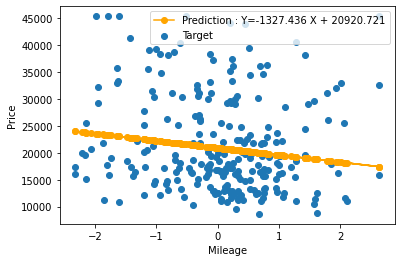

In [28]:
from matplotlib import markers
from pandas.io.formats import style
plt.scatter(X_test_scaled, y_test, label = "Target")

plt.plot(X_test_scaled, y_pred, label = Label,marker ='o',color = 'orange')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


In [29]:
R2_Score = regressor.score(X_test_scaled,y_test)
print(round(R2_Score,4))

0.0093


R2_Score is very Low. This is not a good fit model

# Task 2

In [30]:
Ftrs = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
import itertools

combinations = []

for r in range(len(Ftrs)+1):
    for combination in itertools.combinations(Ftrs, r):
        combinations.append(combination)

print(combinations)

[(), ('Mileage',), ('Cylinder',), ('Liter',), ('Doors',), ('Cruise',), ('Sound',), ('Leather',), ('Mileage', 'Cylinder'), ('Mileage', 'Liter'), ('Mileage', 'Doors'), ('Mileage', 'Cruise'), ('Mileage', 'Sound'), ('Mileage', 'Leather'), ('Cylinder', 'Liter'), ('Cylinder', 'Doors'), ('Cylinder', 'Cruise'), ('Cylinder', 'Sound'), ('Cylinder', 'Leather'), ('Liter', 'Doors'), ('Liter', 'Cruise'), ('Liter', 'Sound'), ('Liter', 'Leather'), ('Doors', 'Cruise'), ('Doors', 'Sound'), ('Doors', 'Leather'), ('Cruise', 'Sound'), ('Cruise', 'Leather'), ('Sound', 'Leather'), ('Mileage', 'Cylinder', 'Liter'), ('Mileage', 'Cylinder', 'Doors'), ('Mileage', 'Cylinder', 'Cruise'), ('Mileage', 'Cylinder', 'Sound'), ('Mileage', 'Cylinder', 'Leather'), ('Mileage', 'Liter', 'Doors'), ('Mileage', 'Liter', 'Cruise'), ('Mileage', 'Liter', 'Sound'), ('Mileage', 'Liter', 'Leather'), ('Mileage', 'Doors', 'Cruise'), ('Mileage', 'Doors', 'Sound'), ('Mileage', 'Doors', 'Leather'), ('Mileage', 'Cruise', 'Sound'), ('Milea

In [ ]:
combinations= combinations[1:]
combinations

In [32]:
Y = df.Price
Ftr_Comb_List = []
R2_Score_lst = []
Slopes = []
Intercepts = []
for i in combinations:
  #i = list(combinations[0])
  #print(i)
  i = list(i)
  X = df[i].values
  X = X.reshape(-1,1) if len(i) ==1 else X
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)
  regressor = LinearRegression() # spredicted score = m * features + c  
  regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c
  y_pred = regressor.predict(X_test)
  R2_Score = round(regressor.score(X_test,y_test),3)
  m = regressor.coef_
  C = regressor.intercept_
  Ftr_Comb_List.append(i)
  R2_Score_lst.append(R2_Score)
  Slopes.append(i)
  Intercepts.append(C)




  #X,len(i)

In [34]:
max(R2_Score_lst)

0.393

In [38]:
Idx = R2_Score_lst.index(max(R2_Score_lst))
Idx
print("The Best Combination of feature is: ", Ftr_Comb_List[Idx])

The Best Combination of feature is:  ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


None of the R2 rate is greater than 0.8. So this is not the best fit model

# Task 3

In [56]:
# Dropping Unnecessary Column
df = df.drop(['Model','Make','Trim','Type'],axis = 1)

In [57]:
X = df.drop('Price',axis = 1)
Y = df.Price.values
X

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,...,9_5 HO,9-2X AWD,Ion,L Series,Sedan,Convertible,Hatchback,Coupe,Wagon,Drive
0,8221.0,6,3.1,4,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,9135.0,6,3.1,4,1,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,13196.0,6,3.1,4,1,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,16342.0,6,3.1,4,1,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,19832.0,6,3.1,4,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229.0,6,3.0,4,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
800,19095.0,6,3.0,4,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
801,20484.0,6,3.0,4,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
802,25979.0,6,3.0,4,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [58]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train_scaled, y_train) #Learning happens - GD is done and we get the final values of m and c
y_pred = regressor.predict(X_test_scaled)
y_pred.shape

(242,)

In [61]:
R2_Score = round(regressor.score(X_test_scaled,y_test),3)
R2_Score

0.913

R2 Value is higher than 0.8. So this model is best fit model

In [63]:
#Slope
m = regressor.coef_
m

array([-1283.24483832, -1345.19104159,  5986.38847832,  -452.93379382,
        -238.57187242,  -290.33879916,   -22.94704465,  -856.96755444,
        3536.46482603, -2470.11653919, -1587.44803473,  3988.48444034,
       -1391.42604993,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,  -452.93379382])

In [64]:
# Intercept
c = regressor.intercept_
c

20920.721012109596

In [ ]:
Ftrs = X.columns
Ftr_Imp_Dic = {"Feature":Ftrs,"Slopes":m}
Ftr_Imp = pd.DataFrame(Ftr_Imp_Dic)

In [68]:
# Zero_Importance Features
Ftr_Imp.Feature.loc[(Ftr_Imp.Slopes == 0)].values

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series', 'Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

Factors that affect Price of the Car

In [74]:
Imp_Feature = Ftr_Imp[['Feature','Slopes']].loc[~(Ftr_Imp.Slopes == 0)]
Imp_Feature = Imp_Feature.sort_values(by=['Slopes'], ascending=False)
Imp_Feature
Imp_Feature.index

Int64Index([2, 11, 8, 6, 4, 5, 3, 50, 7, 0, 1, 12, 10, 9], dtype='int64')

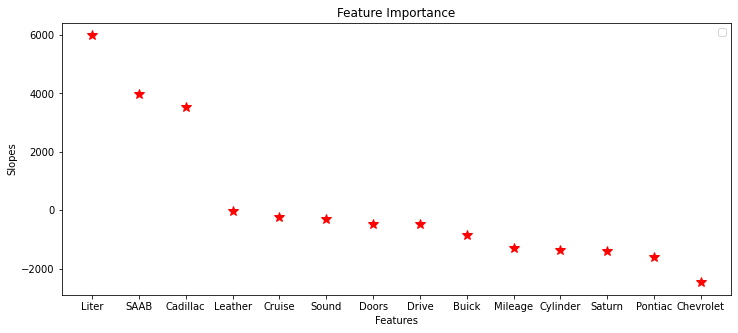

In [86]:
from matplotlib import markers
from pandas.io.formats import style
plt.figure(figsize = (12,5))
plt.plot(Imp_Feature.Feature, Imp_Feature.Slopes,alpha = 1,linestyle = 'none',marker = "*",markersize = 10,color = 'r')
plt.title('Feature Importance')
#plt.plot(X_test_scaled, y_pred, label = Label,marker ='o',color = 'orange')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Slopes')
plt.show()
